In [11]:
from datetime import datetime
import csv
from pathlib import Path
import matplotlib.pyplot as plt

In [12]:
path = Path('./ohio_weather_2024_full.csv')
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)
station_name = ""

In [13]:
for index, column_header in enumerate(header_row):
    print(index,column_header)

0 STATION
1 NAME
2 DATE
3 DAPR
4 MDPR
5 PRCP
6 SNOW


In [14]:
dates,highs = [],[]

for row in reader:
    station_name = row[1]
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = float(row[header_row.index('PRCP')])
    except ValueError:
        print(f'No Data for {current_date}')
    else:
        dates.append(current_date)
        highs.append(high)

No Data for 2024-03-23 00:00:00
No Data for 2024-07-03 00:00:00
No Data for 2024-08-31 00:00:00


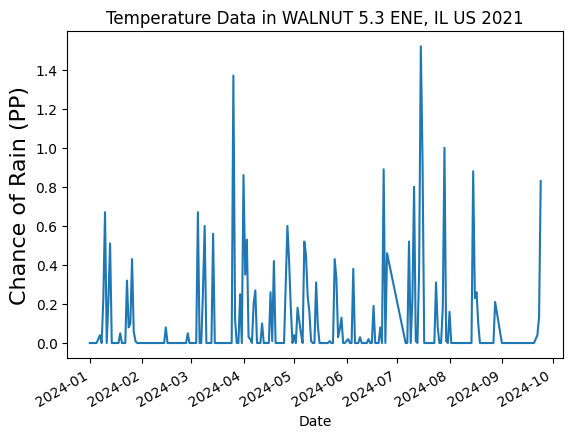

In [15]:
fig, ax = plt.subplots()
ax.plot(dates,highs)
ax.set_title(f'Precipitation Data in {station_name} 2024')
ax.set_ylabel("Chance of Rain (PP)",fontsize=16)
ax.set_xlabel("Date")
fig.autofmt_xdate()

plt.show()